In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline
fig_size = [16, 9]
plt.rcParams['figure.figsize'] = fig_size

In [11]:
# Create random training data
n_class = 500 # n for each class
D = 2         # n records (data)
M = 3         # n nodes in hidden
K = 3         # n classes

In [12]:
X1 = np.random.randn(n_class, D) + np.array([ 0, -2])
X2 = np.random.randn(n_class, D) + np.array([ 2,  2])
X3 = np.random.randn(n_class, D) + np.array([-2,  2])
X = np.vstack([X1, X2, X3]).astype(np.float32)
Y = np.array([0] * n_class + [1] * n_class + [2] * n_class)

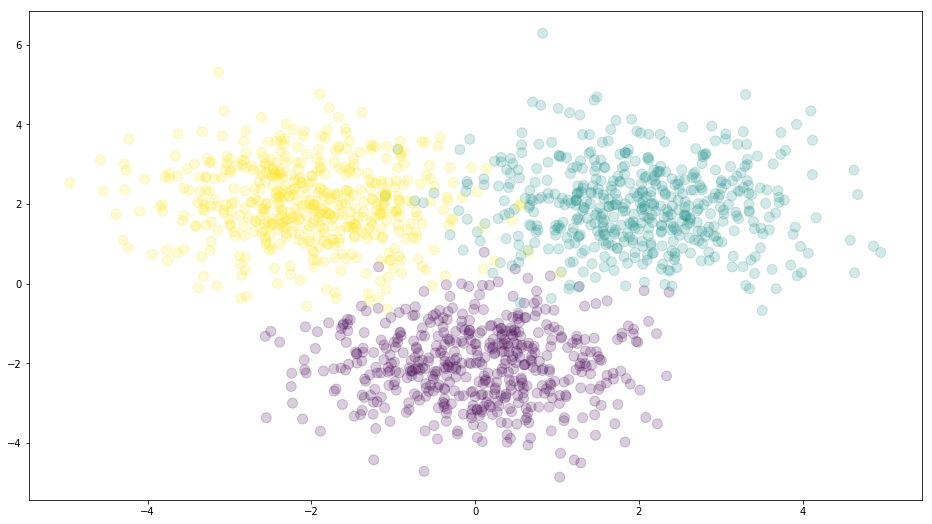

In [13]:
# Vis
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 100, alpha = 0.2);

In [33]:
N = len(Y)

# Convert Y to inidacator matrix
T = np.zeros((N, K))

for i in range(N):
    T[i, Y[i]] = 1

In [34]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev = 0.01))

In [35]:
def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2

In [36]:
tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

W1 = init_weights([D, M])
b1 = init_weights([M])
W2 = init_weights([M, K])
b2 = init_weights([K])

In [37]:
pY = forward(tfX, W1, b1, W2, b2)
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits = pY, labels = tfY))

train_op = tf.train.GradientDescentOptimizer(learning_rate = 0.05)\
    .minimize(cost)
predict_op = tf.argmax(pY, 1)

In [38]:
# Init Session
s = tf.Session()
init = tf.global_variables_initializer()
s.run(init)

In [39]:
for i in range(1500):
    s.run(train_op, feed_dict = { tfX: X, tfY: T })
    pred = s.run(predict_op, feed_dict = { tfX: X, tfY: T })
    
    if i % 50 == 0:
        print(np.mean(Y == pred))

0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.407333333333
0.605333333333
0.659333333333
0.734
0.910666666667
0.953333333333
0.952666666667
0.957333333333
0.959333333333
0.959333333333
0.962
0.964
0.966
0.968666666667
0.971333333333
0.970666666667
0.971333333333
0.971333333333
0.971333333333
0.971333333333
0.971333333333
0.971333333333
0.971333333333
0.971333333333
0.972
